<a href="https://colab.research.google.com/github/stephsallum/astr21/blob/main/sections9to11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASTR21 Winter 2025 Sections 9 to 11 Notebook

In this notebook we'll use data from the [Sloan Digital Sky Survey](https://www.sdss.org/) to re-discover the Hubble diagram! We'll look at SDSS spectra for 25 galaxies to determine their redshifts. We'll calculate velocities from those redshifts, and plot them against independently measured distances to re-create the Hubble diagram. We'll then fit a line to the datapoints to make our own measurement of the Hubble constant.

This notebook uses [pandas](https://pandas.pydata.org/) to load, display, and manipulate data arrays. It also uses [astropy](https://www.astropy.org/) to read in data from fits files.

## First we'll load some modules!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from astropy.io import fits

## Next we'll load our list of galaxies and a bunch of fits files from the course Github.

In [2]:
!wget https://github.com/stephsallum/astr21/raw/refs/heads/main/secs9to11_data.zip
!unzip secs9to11_data.zip

--2025-03-17 18:03:16--  https://github.com/stephsallum/astr21/raw/refs/heads/main/secs9to11_data.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/stephsallum/astr21/refs/heads/main/secs9to11_data.zip [following]
--2025-03-17 18:03:17--  https://raw.githubusercontent.com/stephsallum/astr21/refs/heads/main/secs9to11_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2444518 (2.3M) [application/zip]
Saving to: ‘secs9to11_data.zip’

secs9to11_data.zip  100%[===================>]   2.33M  --.-KB/s    in 0.06s   

2025-03-17 18:03:17 (40.2 MB/s) - ‘secs9to11_data.zip’ saved [2444518/2444518]

## Let's load in the list of galaxies and display it using pandas.

Before we display it, we'll add a column to the array so that we can eventually store the velocities of our galaxies!

In [3]:
df = pd.read_csv('secs9to11_data/galaxy_data.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df['Velocity v (km/s)'] = 'None'

After you display the table by executing the cell below, click the top button that appears on the right next to the first row of the table, to make it interactive.

In [4]:
df

,index,Galaxy name,Redshift Independent Distance,Distance (Mpc),Spectral FITS,Filename,Redshift,Velocity v (km/s)
0,0,NGC 99,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,29.100,https://skyserver.sdss.org/dr12/en/tools/explo...,NGC99.fits,NaN,None
1,1,NGC 2713,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,61.344,https://skyserver.sdss.org/dr12/en/tools/explo...,NGC2713.fits,NaN,None
2,2,NGC 3440,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,40.533,https://skyserver.sdss.org/dr12/en/tools/explo...,NGC3440.fits,NaN,None
3,3,NGC 7108,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,92.950,https://skyserver.sdss.org/dr12/en/tools/explo...,NGC7108.fits,NaN,None
4,4,NGC 450,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,17.613,https://skyserver.sdss.org/dr12/en/tools/explo...,NGC450.fits,NaN,None
5,5,NGC 5750,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,30.086,https://skyserver.sdss.org/dr12/en/tools/explo...,NGC5750.fits,NaN,None
6,6,NGC 5719,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,26.118,https://skyserver.sdss.org/dr12/en/tools/explo...,NGC5719.fits,NaN,None
7,7,[BKD2008] WR 52,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,13.989,https://skyserver.sdss.org/dr12/en/tools/explo...,WR52.fits,NaN,None
8,8,NGC 5334,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,33.320,https://skyserver.sdss.org/dr12/en/tools/explo...,NGC5334.fits,NaN,None
9,9,NGC 5496,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,21.887,https://skyserver.sdss.org/dr12/en/tools/explo...,NGC5496.fits,NaN,None


The last thing we'll need to do is save the speed of light as a variable called "c", which we'll use to convert redshifts to recessional velocities later! We can save it in km/s.

In [5]:
c = 299792 #speed of light in km/s

## Next we'll graph the spectra of galaxies and find their emission lines

We'll first define a few functions to generate Gaussian-shaped emission lines, then to calculate both redshifts and recessional velocities.

In [6]:
def gauss(x, A, mu, sigma, c):
    return (A * np.exp(-(x - mu)**2 / (2 * sigma**2))) + c

In [7]:
def get_redshift(lamo, lame):       # writing the redshift function
    return (lamo-lame)/lame         # lamo = observed wavelength
                                    # lame = emitted wavelength

def recessional_velocity(z):        # writing the recessional velocity function
    v = z*c                         # z = redshift, c = speed of light
    return v

Next, let's plot our galaxy! Change the filename in the following cell to match the galaxy you've been assigned!

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


Text(0, 0.5, 'flux')

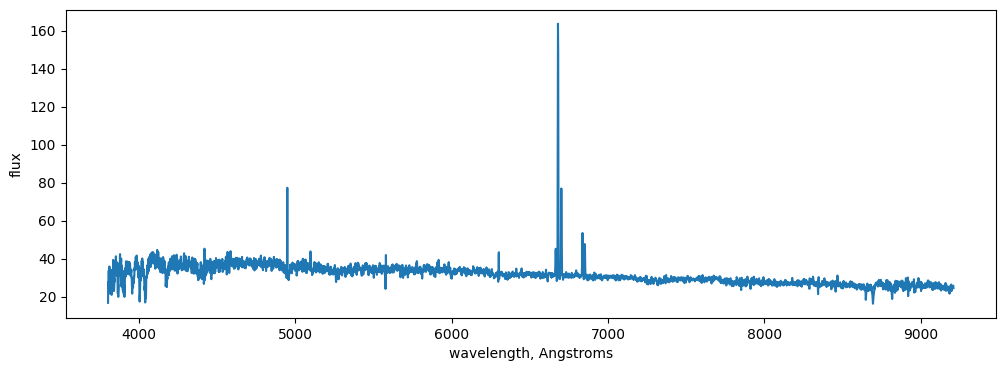

In [8]:
filename = 'NGC99.fits' ###CHANGE ME TO MATCH THE FILENAME ENTRY FOR YOUR GALAXY!

hdul = fits.open('secs9to11_data/'+str(filename))   # hdul = Header Data Unit list
print(hdul[1].columns)                          # checking what the header data looks like

# now we can create lists from the data in the FITS file
spec = hdul[1].data['flux']                     # let's call flux "spec(trum)"...
waves = 10**hdul[1].data['loglam']              # ...and loglam "waves" (raising everything to the power of 10)

fig = plt.figure()
fig.set_size_inches(12,4)


plt.plot(waves, spec)
plt.xlabel("wavelength, Angstroms")
plt.ylabel("flux")

The cell below will zoom in on a portion of the spectrum that you'll tune to span the H-alpha line. In order to check that your limits are right, copy the link to the SDSS spectral explorer for your galaxy, in the "Spectral FITS" entry of the table row. Paste that into your browser in a new tab. You'll see a page with lots of info about your galaxy, including a plot of a spectrum with some lines labeled. Click on the spectrum to find H-alpha, and then change the min and max x values in the cell below based on its location!

Text(0, 0.5, 'flux')

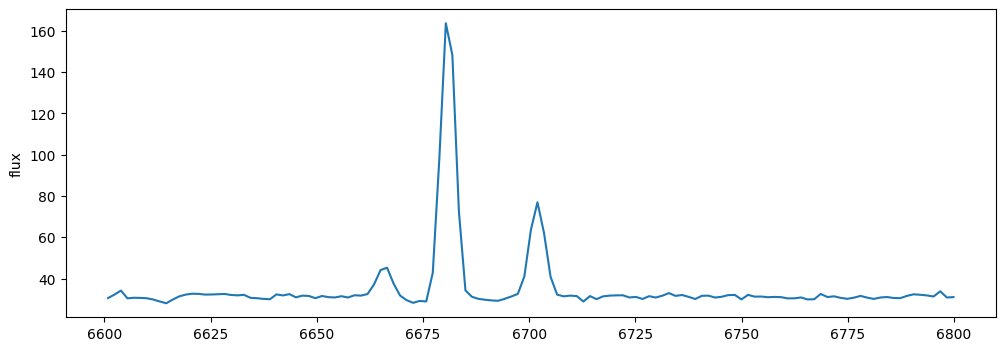

In [9]:
x_min = 6600 ###CHANGE ME TO SET MINIMUM WAVELENGTH
x_max = 6800 ###CHANGE ME TO SET MAXIMUM WAVELENGTH

mask = (waves >= x_min) & (waves <= x_max)
waves2 = waves[mask]
spec2 = spec[mask]


fig = plt.figure()
fig.set_size_inches(12,4)


plt.plot(waves2, spec2)
plt.ylabel("flux")

In the next cell, we'll fit a Gaussian to our H alpha line! Change the list of values after initial guess to your best guesses of:

1) The peak flux value of the H-alpha line

2) The central wavelength value of the H-alpha line

3) The rough width of the H-alpha line (this one you should be able to leave at 1.5)

4) The continuum level

When you execute the cell, it will use those guesses to optimize your gaussian. Tune those values until the cell produces a plot with a red line that matches your H-alpha line.

Fitted Parameters:
Amplitude: 139.95641617301686
Mean: 6680.8738245085
Standard Deviation: 1.6199143174600907
Continuum Level: 32.441683251238


Text(0.5, 1.0, 'Fitting Gaussian to Spectrum')

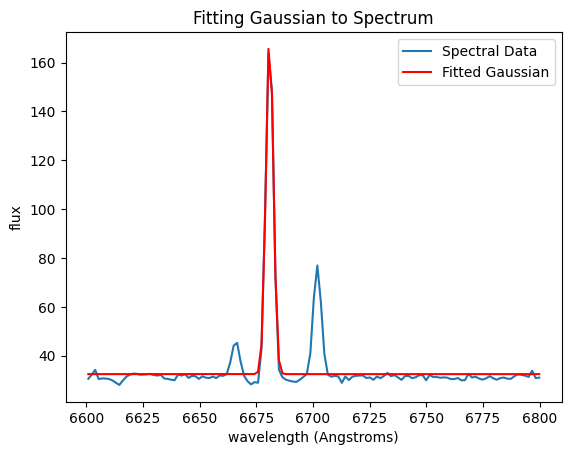

In [10]:
# Fit the Gaussian profile to the data
initial_guess = [160, 6680, 1.5, 60]  # A, mu, sigma, c   NGC99

fit_params, _ = curve_fit(gauss, waves2, spec2, p0=initial_guess)


...

# Print the fitted parameters
print("Fitted Parameters:")
print("Amplitude:", fit_params[0])
print("Mean:", fit_params[1])
print("Standard Deviation:", fit_params[2])
print("Continuum Level:", fit_params[3])


# Plot the original data and the fitted Gaussian
plt.plot(waves2, spec2, label="Spectral Data")
plt.plot(waves2, gauss(waves2, *fit_params), color='red', label="Fitted Gaussian")
plt.legend()
plt.xlabel("wavelength (Angstroms)")
plt.ylabel("flux")
plt.title("Fitting Gaussian to Spectrum")

We can now use our line's central wavelength to calculate a redshift! Let's do that and print it.

In [11]:
lamo = fit_params[1]  # Gaussian mean         # the emitted wavelength from this galaxy is the mean of the fitted function
lamr = 6563                                   # the original wavelength of this band is about 6563 angstrom
z = get_redshift(lamo, lamr)
z

np.float64(0.017960357231220424)

Once you have a redshift, add it to the appropriate entry in the list in this [google doc](https://docs.google.com/document/d/1HYsLDwII04BPrBdKXzYcYN07RJ6JTY2_8Umw3L7iU1E/edit?usp=sharing)! Once we've all added our redshifts, we can continue below by pasting the list into the next code cell.

# Calculate velocities from redshifts

At this point, we should have, as a class, generated a list of redshifts! Enter that list in order in the following cell.

In [12]:
z_list = [
0.01796, #0
0.013 , #1
0.006 , #2
0.023 , #3
0.006 , #4
0.006 , #5
0.006 , #6
0.005 , #7
0.005 , #8
0.005 , #9
0.018 , #10
0.006 , #11
0.006 , #12
0.007 , #13
0.012 , #14
0.018 , #15
0.004 , #16
0.005 , #17
0.019 , #18
0.023 , #19
0.02 , #20
0.006 , #21
0.006 , #22
0.015 , #23
0.018 , #24
]


Let's take our list of redshifts and convert it to velocities!

In [13]:
v_list = [recessional_velocity(zz) for zz in z_list]

print(c)
print("redshifts:", z_list)
print("recessional velocity: ", np.array(v_list))

299792
redshifts: [0.01796, 0.013, 0.006, 0.023, 0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.018, 0.006, 0.006, 0.007, 0.012, 0.018, 0.004, 0.005, 0.019, 0.023, 0.02, 0.006, 0.006, 0.015, 0.018]
recessional velocity:  [5384.26432 3897.296   1798.752   6895.216   1798.752   1798.752
 1798.752   1498.96    1498.96    1498.96    5396.256   1798.752
 1798.752   2098.544   3597.504   5396.256   1199.168   1498.96
 5696.048   6895.216   5995.84    1798.752   1798.752   4496.88
 5396.256  ]


In [14]:
df['Velocity v (km/s)'] = np.array(v_list)

# Plot velocity against distance and fit a line to the data

Slope =  60.600434772519755 km/s/Mpc


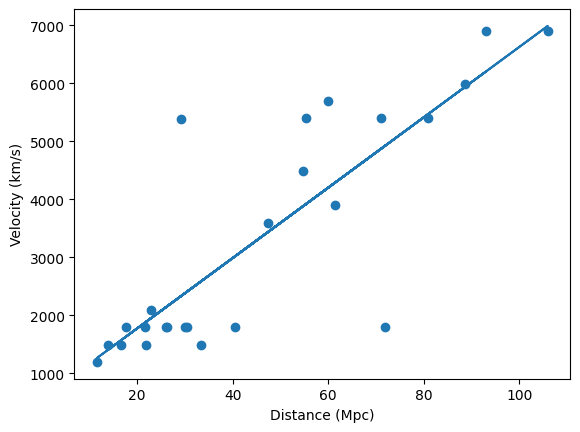

In [15]:
x = df['Distance (Mpc)'].to_numpy()
y = df['Velocity v (km/s)'].to_numpy()


plt.scatter(x,y)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
print("Slope = ", a, "km/s/Mpc")